# DKT

In [1]:
"""
    TODO:
        - Generate timespent form timestamp.
            timespent
            
        - Descritptive Stats
            
    COMPLETE:
        - Process dtype conversion by dict.
        ex.
            u_id: category
            a_id: category
            t_cat: category
            t_id: category
            timestamp: datetime64[ns]
            tag: category
            answer: int64
            
        - Process assessment_id to a_id, t_cat, and t_id.
            a_id  (category): assessment_id[7:]
            t_cat (category): assessment_id[1:7][1]
            t_id  (category): assessment_id[1:7][3:]
"""
pass

## Init

In [2]:
import os
import typing
from typing import List, Tuple, Dict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

## Constants

In [3]:
RENAME_COLUMNS = {
    "userID": "u_id",
    "assessmentItemID": "assessment_id",
    "testId": "test_id",
    "answerCode": "answer",
    "Timestamp": "timestamp",
    "KnowledgeTag": "tag",
}

TARGET_COLUMNS = ["u_id", "a_id", "t_cat", "t_id", "timestamp", "tag", "answer"]
TARGET_COLUMNS_DTYPES = {
    "u_id": "category",
    "a_id": "category",
    "t_cat": "category",
    "t_id": "category",
    "timestamp": "datetime64[ns]",
    "tag": "category",
    "answer": "int64",
}

RED = "#EF7C7C"
BLUE = "#3B3086"
GREEN = "#5BD19A"
ORANGE = "#FAE06F"

## Utils

In [4]:
def get_intersect_list(list1: List, list2: List) -> List:
    """Get the overlapped elements in two lists.
    Args:
        list1 (List): Target list to get overlapped elements.
        list2 (List): Target list to get overlapped elements.

    Return:
        Result list with overlapped elements between list1 and list2.
    """
    return list(set(list1) & set(list2))


def split_assessment_id(
    assessment_id: pd.Series,
) -> Tuple[pd.Series, pd.Series, pd.Series]:
    """Split assessment_id column into a_id, t_cat, and t_id.
    Returns:
        a_id, t_cat, t_id (Tuple[pd.Series, pd.Series, pd.Series])
            a_id: assessment_id[7:]
            t_cat: assessment_id[1:7][1]
            t_id: assessment_id[1:7][3:]
    """
    a_id = assessment_id.map(lambda x: x[7:]).astype("category")
    t_cat = assessment_id.map(lambda x: x[1:7][1]).astype("category")
    t_id = assessment_id.map(lambda x: x[1:7][3:]).astype("category")
    return a_id, t_cat, t_id


def process_columns(
    original: pd.DataFrame,
    target_columns: List[str],
    target_columns_dtypes: Dict[str, str],
) -> pd.DataFrame:
    """Process columns by following steps.
    1. Generate columns according to target_columns.
    2. Change the order of columns according to target_columns.
    3. Change the dtypes according to target_columns_dtypes.
    Args:
        original (pd.DataFrame): Target dataframe to process.
        target_columns (List[str]): Name list of target columns.
        target_columns_dtypes (Dict[str, str]): Data type dict of target columns.

    Return:
        Dataframe fits to target_columns and target_columns_dtypes.
    """
    result_df = original.copy()

    if "a_id" in target_columns:
        a_id, t_cat, t_id = split_assessment_id(result_df["assessment_id"])
        result_df["a_id"] = a_id
        result_df["t_cat"] = t_cat
        result_df["t_id"] = t_id

    result_df = result_df[target_columns]
    result_df = result_df.astype(target_columns_dtypes)
    return result_df

## Load Data

In [5]:
data_path = "../data/"
train_path = os.path.join(data_path, "train_data.csv")
test_path = os.path.join(data_path, "test_data.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
train_df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag'],
      dtype='object')

In [7]:
train_df = train_df.rename(columns=RENAME_COLUMNS)
test_df = test_df.rename(columns=RENAME_COLUMNS)

In [8]:
train_df.head()

,u_id,assessment_id,test_id,answer,timestamp,tag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [9]:
test_df.head()

,u_id,assessment_id,test_id,answer,timestamp,tag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623


## Single Column

### u_id

In [10]:
train_df["u_id"].head()

0    0
1    0
2    0
3    0
4    0
Name: u_id, dtype: int64

In [11]:
train_df["u_id"].dtype

dtype('int64')

In [12]:
train_df["u_id"].nunique()

6698

In [13]:
test_df["u_id"].nunique()

744

In [14]:
# No one overlaps in both train and test.
len(get_intersect_list(train_df["u_id"].unique(), test_df["u_id"].unique()))

0

### assessment_id

In [15]:
train_df["assessment_id"].head()

0    A060001001
1    A060001002
2    A060001003
3    A060001004
4    A060001005
Name: assessment_id, dtype: object

In [16]:
aid_0 = train_df["assessment_id"].map(lambda x: x[0]).rename("aid0")
aid_1to6 = train_df["assessment_id"].map(lambda x: x[1:7]).rename("aid_1to6")
aid_7to9 = train_df["assessment_id"].map(lambda x: x[7:10]).rename("aid_7to9")

In [17]:
aid_0.value_counts()

aid0
A    2266586
Name: count, dtype: int64

In [18]:
aid_1to6

0          060001
1          060001
2          060001
3          060001
4          060001
            ...  
2266581    030071
2266582    040165
2266583    040165
2266584    040165
2266585    040165
Name: aid_1to6, Length: 2266586, dtype: object

In [19]:
# There are 1537 test numbers.
aid_1to6.value_counts()

aid_1to6
080128    3960
080131    3640
090015    3624
090011    3616
090009    3616
          ... 
030186     180
010166     176
010178     176
010181     176
010179     172
Name: count, Length: 1537, dtype: int64

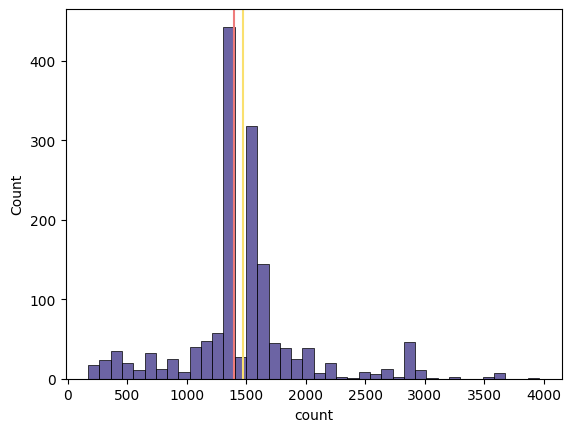

In [20]:
# The number of each test number exists around 1500.
# The number of each test number is right skewed.
aid_1to6_counts = aid_1to6.value_counts()
sns.histplot(data=aid_1to6_counts, linewidth=0.5, bins=40, color=BLUE)
plt.axvline(aid_1to6_counts.median(), color=RED)
plt.axvline(aid_1to6_counts.mean(), color=ORANGE)

aid_7to9
001    371755
003    371640
002    370972
004    369705
005    360607
006    197772
007    127121
008     67150
009     18417
010      5342
011      3352
012      2484
013       269
Name: count, dtype: int64


<Axes: xlabel='aid_7to9', ylabel='Count'>

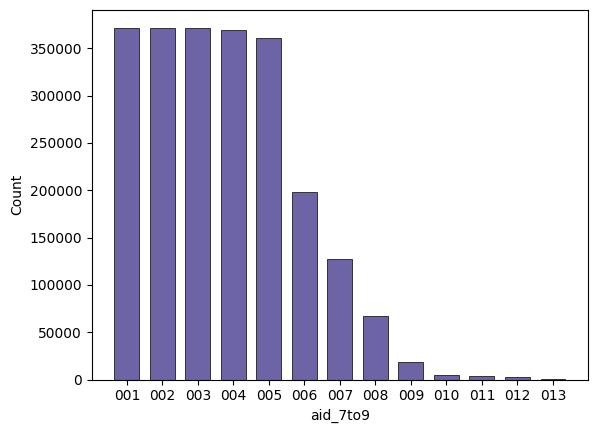

In [21]:
# Question number is in range [1, 13].
# The number of big numbers is less than small numbers'.
print(aid_7to9.value_counts())
aid_7to9_cat = aid_7to9.astype("category").sort_index()
sns.histplot(aid_7to9_cat, linewidth=0.5, shrink=0.7, color=BLUE)

In [22]:
train_df["assessment_id"].dtype

dtype('O')

In [23]:
train_df["assessment_id"].nunique()

9454

### test_id

In [24]:
train_df["test_id"].head()

0    A060000001
1    A060000001
2    A060000001
3    A060000001
4    A060000001
Name: test_id, dtype: object

In [25]:
train_df["test_id"].dtype

dtype('O')

In [26]:
train_df["test_id"].nunique()

1537

In [27]:
# Same as aID_1to6 >> ** Can be removed **
tid_ = train_df["test_id"].map(lambda x: x[1:4] + x[-3:]).rename("tid_")
tid_

0          060001
1          060001
2          060001
3          060001
4          060001
            ...  
2266581    030071
2266582    040165
2266583    040165
2266584    040165
2266585    040165
Name: tid_, Length: 2266586, dtype: object

In [28]:
t_cat = tid_.map(lambda x: x[1]).rename("t_cat").astype("category")
t_id = tid_.map(lambda x: x[3:7]).rename("t_id").astype("category")

In [29]:
t_cat

0          6
1          6
2          6
3          6
4          6
          ..
2266581    3
2266582    4
2266583    4
2266584    4
2266585    4
Name: t_cat, Length: 2266586, dtype: category
Categories (9, object): ['1', '2', '3', '4', ..., '6', '7', '8', '9']

t_cat
7    279164
5    275773
3    273762
1    272082
2    268327
4    267323
6    264434
8    246336
9    119385
Name: count, dtype: int64


<Axes: xlabel='t_cat', ylabel='Count'>

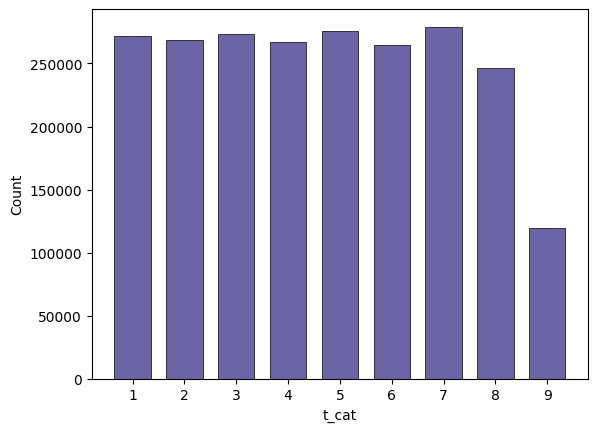

In [30]:
# The number of categories are similar except category 9.
print(t_cat.value_counts())
sns.histplot(t_cat, linewidth=0.5, shrink=0.7, color=BLUE)

In [31]:
t_id

0          001
1          001
2          001
3          001
4          001
          ... 
2266581    071
2266582    165
2266583    165
2266584    165
2266585    165
Name: t_id, Length: 2266586, dtype: category
Categories (198, object): ['001', '002', '003', '004', ..., '195', '196', '197', '198']

t_id
017    17739
009    17555
011    17029
003    16970
007    16826
       ...  
180     3767
197     2973
194     2596
196     1304
198      951
Name: count, Length: 198, dtype: int64


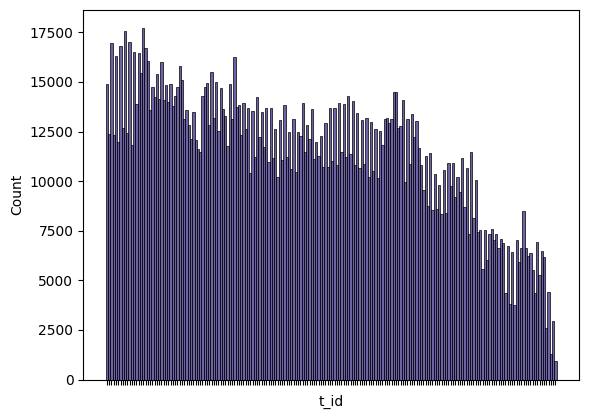

In [32]:
# Ther larger Test ID is generally less than smaller one.
print(t_id.value_counts())
sns.histplot(t_id, linewidth=0.5, color=BLUE).set(xticklabels=[])
plt.show()

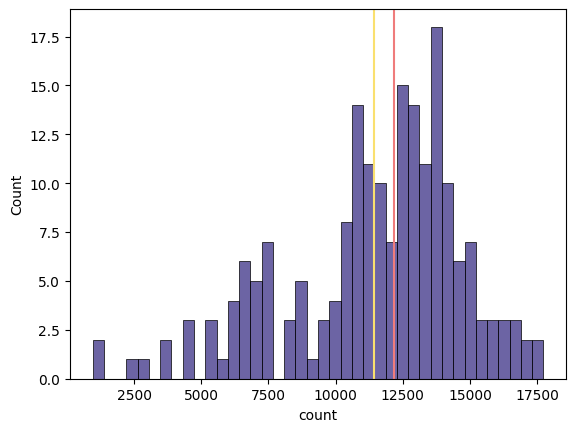

In [33]:
# The number of each test ID exists around 1500.
# The number of each test ID is left skewed.
sns.histplot(t_id.value_counts(), bins=40, linewidth=0.5, color=BLUE)
plt.axvline(t_id.value_counts().median(), color=RED)
plt.axvline(t_id.value_counts().mean(), color=ORANGE)

### answer

In [34]:
# 65% answers are correct and the others(35%) are incorrect.
train_df["answer"].value_counts(normalize=True)

answer
1    0.654378
0    0.345622
Name: proportion, dtype: float64

In [35]:
train_df["answer"].dtype

dtype('int64')

### timestamp

In [36]:
train_df["timestamp"].head()

0    2020-03-24 00:17:11
1    2020-03-24 00:17:14
2    2020-03-24 00:17:22
3    2020-03-24 00:17:29
4    2020-03-24 00:17:36
Name: timestamp, dtype: object

In [37]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["timestamp"].head()

0   2020-03-24 00:17:11
1   2020-03-24 00:17:14
2   2020-03-24 00:17:22
3   2020-03-24 00:17:29
4   2020-03-24 00:17:36
Name: timestamp, dtype: datetime64[ns]

### tag

In [38]:
train_df["tag"].head()

0    7224
1    7225
2    7225
3    7225
4    7225
Name: tag, dtype: int64

tag
7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: count, Length: 912, dtype: int64


<Axes: xlabel='tag', ylabel='Count'>

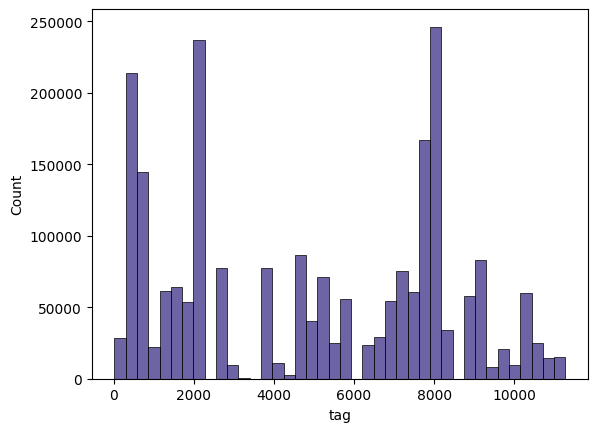

In [39]:
print(train_df["tag"].value_counts())
sns.histplot(train_df["tag"], bins=40, linewidth=0.5, color=BLUE)

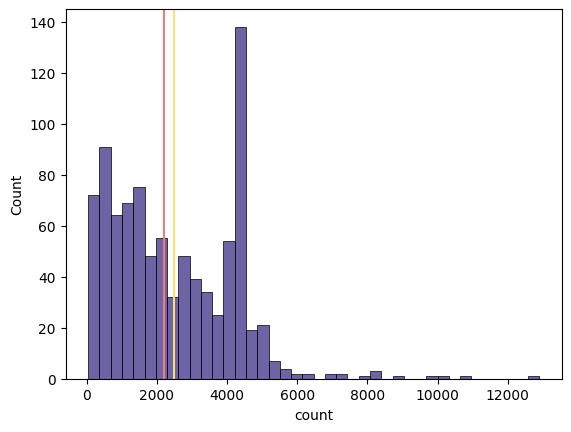

In [40]:
# The number of each tag exists around 2000.
# The number of each tag is right skewed.
# Less than 1000 and around 4000 are dominants.
sns.histplot(train_df["tag"].value_counts(), bins=40, linewidth=0.5, color=BLUE)
plt.axvline(train_df["tag"].value_counts().median(), color=RED)
plt.axvline(train_df["tag"].value_counts().mean(), color=ORANGE)

In [41]:
train_df = pd.read_csv(train_path).rename(columns=RENAME_COLUMNS)

In [42]:
processed_df = process_columns(train_df, TARGET_COLUMNS, TARGET_COLUMNS_DTYPES)
print(processed_df.info())
processed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   u_id       category      
 1   a_id       category      
 2   t_cat      category      
 3   t_id       category      
 4   timestamp  datetime64[ns]
 5   tag        category      
 6   answer     int64         
dtypes: category(5), datetime64[ns](1), int64(1)
memory usage: 52.2 MB
None


,u_id,a_id,t_cat,t_id,timestamp,tag,answer
0,0,001,6,001,2020-03-24 00:17:11,7224,1
1,0,002,6,001,2020-03-24 00:17:14,7225,1
2,0,003,6,001,2020-03-24 00:17:22,7225,1
3,0,004,6,001,2020-03-24 00:17:29,7225,1
4,0,005,6,001,2020-03-24 00:17:36,7225,1


## Descriptive Stats